In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix

In [2]:
from sklearn.datasets import load_digits

In [3]:
digits = load_digits()

In [4]:
digits

{'data': array([[ 0.,  0.,  5., ...,  0.,  0.,  0.],
        [ 0.,  0.,  0., ..., 10.,  0.,  0.],
        [ 0.,  0.,  0., ..., 16.,  9.,  0.],
        ...,
        [ 0.,  0.,  1., ...,  6.,  0.,  0.],
        [ 0.,  0.,  2., ..., 12.,  0.,  0.],
        [ 0.,  0., 10., ..., 12.,  1.,  0.]]),
 'target': array([0, 1, 2, ..., 8, 9, 8]),
 'frame': None,
 'feature_names': ['pixel_0_0',
  'pixel_0_1',
  'pixel_0_2',
  'pixel_0_3',
  'pixel_0_4',
  'pixel_0_5',
  'pixel_0_6',
  'pixel_0_7',
  'pixel_1_0',
  'pixel_1_1',
  'pixel_1_2',
  'pixel_1_3',
  'pixel_1_4',
  'pixel_1_5',
  'pixel_1_6',
  'pixel_1_7',
  'pixel_2_0',
  'pixel_2_1',
  'pixel_2_2',
  'pixel_2_3',
  'pixel_2_4',
  'pixel_2_5',
  'pixel_2_6',
  'pixel_2_7',
  'pixel_3_0',
  'pixel_3_1',
  'pixel_3_2',
  'pixel_3_3',
  'pixel_3_4',
  'pixel_3_5',
  'pixel_3_6',
  'pixel_3_7',
  'pixel_4_0',
  'pixel_4_1',
  'pixel_4_2',
  'pixel_4_3',
  'pixel_4_4',
  'pixel_4_5',
  'pixel_4_6',
  'pixel_4_7',
  'pixel_5_0',
  'pixel_5_1',
 

In [5]:
dir(digits)

['DESCR', 'data', 'feature_names', 'frame', 'images', 'target', 'target_names']

In [6]:
digits.data

array([[ 0.,  0.,  5., ...,  0.,  0.,  0.],
       [ 0.,  0.,  0., ..., 10.,  0.,  0.],
       [ 0.,  0.,  0., ..., 16.,  9.,  0.],
       ...,
       [ 0.,  0.,  1., ...,  6.,  0.,  0.],
       [ 0.,  0.,  2., ..., 12.,  0.,  0.],
       [ 0.,  0., 10., ..., 12.,  1.,  0.]])

In [7]:
df = pd.DataFrame(digits.data)

In [8]:
df.head(2)

,0,1,2,3,4,5,6,7,8,9,...,54,55,56,57,58,59,60,61,62,63
0,0.0,0.0,5.0,13.0,9.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,6.0,13.0,10.0,0.0,0.0,0.0
1,0.0,0.0,0.0,12.0,13.0,5.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,11.0,16.0,10.0,0.0,0.0


In [9]:
df = pd.DataFrame(digits.data,columns = digits.feature_names)

In [11]:
df.head(2)

,pixel_0_0,pixel_0_1,pixel_0_2,pixel_0_3,pixel_0_4,pixel_0_5,pixel_0_6,pixel_0_7,pixel_1_0,pixel_1_1,...,pixel_6_6,pixel_6_7,pixel_7_0,pixel_7_1,pixel_7_2,pixel_7_3,pixel_7_4,pixel_7_5,pixel_7_6,pixel_7_7
0,0.0,0.0,5.0,13.0,9.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,6.0,13.0,10.0,0.0,0.0,0.0
1,0.0,0.0,0.0,12.0,13.0,5.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,11.0,16.0,10.0,0.0,0.0


In [12]:
digits.target

array([0, 1, 2, ..., 8, 9, 8])

In [13]:
df['target'] = digits.target

In [14]:
df['target']

0       0
1       1
2       2
3       3
4       4
       ..
1792    9
1793    0
1794    8
1795    9
1796    8
Name: target, Length: 1797, dtype: int32

In [15]:
df.shape

(1797, 65)

In [16]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1797 entries, 0 to 1796
Data columns (total 65 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   pixel_0_0  1797 non-null   float64
 1   pixel_0_1  1797 non-null   float64
 2   pixel_0_2  1797 non-null   float64
 3   pixel_0_3  1797 non-null   float64
 4   pixel_0_4  1797 non-null   float64
 5   pixel_0_5  1797 non-null   float64
 6   pixel_0_6  1797 non-null   float64
 7   pixel_0_7  1797 non-null   float64
 8   pixel_1_0  1797 non-null   float64
 9   pixel_1_1  1797 non-null   float64
 10  pixel_1_2  1797 non-null   float64
 11  pixel_1_3  1797 non-null   float64
 12  pixel_1_4  1797 non-null   float64
 13  pixel_1_5  1797 non-null   float64
 14  pixel_1_6  1797 non-null   float64
 15  pixel_1_7  1797 non-null   float64
 16  pixel_2_0  1797 non-null   float64
 17  pixel_2_1  1797 non-null   float64
 18  pixel_2_2  1797 non-null   float64
 19  pixel_2_3  1797 non-null   float64
 20  pixel_2_

In [17]:
df.isnull().sum()

pixel_0_0    0
pixel_0_1    0
pixel_0_2    0
pixel_0_3    0
pixel_0_4    0
            ..
pixel_7_4    0
pixel_7_5    0
pixel_7_6    0
pixel_7_7    0
target       0
Length: 65, dtype: int64

In [18]:
digits.data[0]

array([ 0.,  0.,  5., 13.,  9.,  1.,  0.,  0.,  0.,  0., 13., 15., 10.,
       15.,  5.,  0.,  0.,  3., 15.,  2.,  0., 11.,  8.,  0.,  0.,  4.,
       12.,  0.,  0.,  8.,  8.,  0.,  0.,  5.,  8.,  0.,  0.,  9.,  8.,
        0.,  0.,  4., 11.,  0.,  1., 12.,  7.,  0.,  0.,  2., 14.,  5.,
       10., 12.,  0.,  0.,  0.,  0.,  6., 13., 10.,  0.,  0.,  0.])

In [19]:
 s = digits.images[0]

In [20]:
s

array([[ 0.,  0.,  5., 13.,  9.,  1.,  0.,  0.],
       [ 0.,  0., 13., 15., 10., 15.,  5.,  0.],
       [ 0.,  3., 15.,  2.,  0., 11.,  8.,  0.],
       [ 0.,  4., 12.,  0.,  0.,  8.,  8.,  0.],
       [ 0.,  5.,  8.,  0.,  0.,  9.,  8.,  0.],
       [ 0.,  4., 11.,  0.,  1., 12.,  7.,  0.],
       [ 0.,  2., 14.,  5., 10., 12.,  0.,  0.],
       [ 0.,  0.,  6., 13., 10.,  0.,  0.,  0.]])

<Figure size 432x288 with 0 Axes>

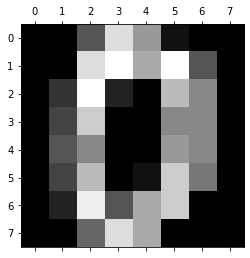

In [21]:
plt.gray()
plt.matshow(s)  # matshow used in give array
plt.show()

<Figure size 432x288 with 0 Axes>

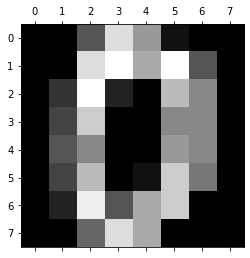

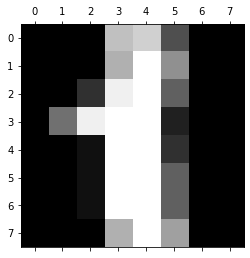

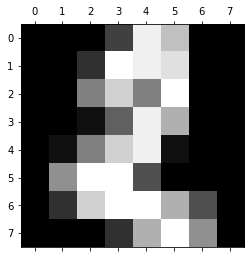

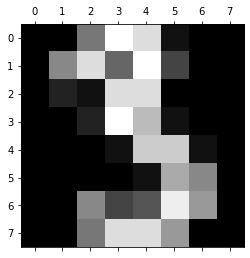

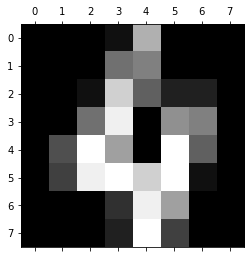

In [22]:
plt.gray()  #  used = find first five images
for i in range(5):
    plt.matshow(digits.images[i])
    plt.show()

In [23]:
from sklearn.model_selection import train_test_split

In [25]:
X = df.drop("target",axis=1)

In [26]:
y = df.target

In [27]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=42)

In [28]:
X_train.shape

(1437, 64)

In [29]:
X_test.shape

(360, 64)

In [30]:
y_test

1245    6
220     9
1518    3
438     7
1270    2
       ..
1731    4
1630    3
1037    8
965     3
1461    5
Name: target, Length: 360, dtype: int32

In [31]:
from sklearn.tree import DecisionTreeClassifier

In [32]:
model = DecisionTreeClassifier()

In [33]:
model.fit(X_train,y_train)

DecisionTreeClassifier()

In [34]:
model.score(X_test,y_test)

0.8444444444444444

In [35]:
import matplotlib.pyplot as plt 
from sklearn import tree

[Text(164.59534015486727, 421.29, 'X[36] <= 0.5\ngini = 0.9\nsamples = 1437\nvalue = [145, 154, 144, 149, 135, 135, 146, 145, 144, 140]'),
 Text(40.492035398230094, 394.11, 'X[42] <= 5.0\ngini = 0.539\nsamples = 223\nvalue = [143, 0, 3, 1, 6, 17, 4, 0, 3, 46]'),
 Text(19.75221238938053, 366.93, 'X[21] <= 6.5\ngini = 0.376\nsamples = 59\nvalue = [0, 0, 1, 1, 0, 12, 0, 0, 0, 45]'),
 Text(7.900884955752213, 339.75, 'X[62] <= 1.5\ngini = 0.272\nsamples = 13\nvalue = [0, 0, 1, 0, 0, 11, 0, 0, 0, 1]'),
 Text(3.9504424778761065, 312.57, 'gini = 0.0\nsamples = 11\nvalue = [0, 0, 0, 0, 0, 11, 0, 0, 0, 0]'),
 Text(11.85132743362832, 312.57, 'X[26] <= 0.5\ngini = 0.5\nsamples = 2\nvalue = [0, 0, 1, 0, 0, 0, 0, 0, 0, 1]'),
 Text(7.900884955752213, 285.39, 'gini = 0.0\nsamples = 1\nvalue = [0, 0, 1, 0, 0, 0, 0, 0, 0, 0]'),
 Text(15.801769911504426, 285.39, 'gini = 0.0\nsamples = 1\nvalue = [0, 0, 0, 0, 0, 0, 0, 0, 0, 1]'),
 Text(31.603539823008852, 339.75, 'X[34] <= 9.5\ngini = 0.084\nsamples = 46\

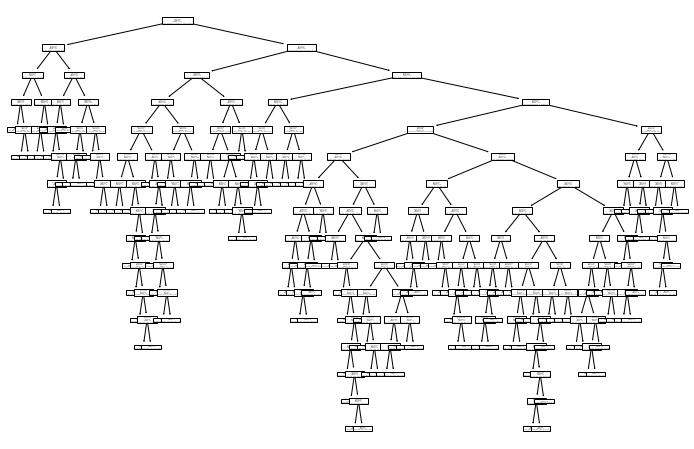

In [36]:
plt.figure(figsize=(12,8))
tree.plot_tree(model.fit(X_train,y_train))

In [41]:
from sklearn.ensemble import RandomForestClassifier

In [42]:
rf = RandomForestClassifier()

In [43]:
rf.fit(X_train,y_train)

RandomForestClassifier()

In [44]:
rf.score(X_test,y_test)

0.975